## Min Max Scaling  
Min Max Scaling scales the values between 0 to 1.<br>
X_scaled = (X - X.min / (X.max - X.min)

## (i) Scaling/Transforming the dataset as df 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv', usecols=['Survived',"Pclass","Fare","Age"])

In [3]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


Text(0.5, 1.0, 'Before MinMax Scaling')

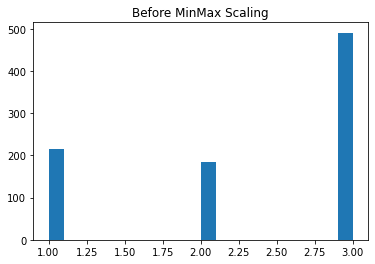

In [5]:
plt.hist(df['Pclass'],bins=20)
plt.title("Before MinMax Scaling")

Text(0.5, 1.0, 'After MinMax Scaling')

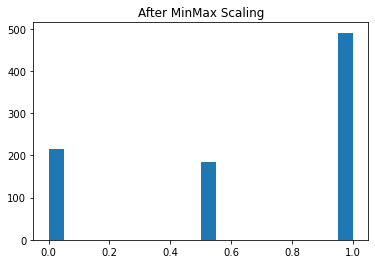

In [6]:
plt.hist(df_minmax['Pclass'],bins=20)
plt.title("After MinMax Scaling")

Text(0.5, 1.0, 'Before MinMax Scaling')

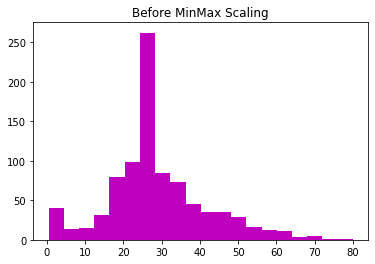

In [7]:
plt.hist(df['Age'],bins=20, color='m')
plt.title("Before MinMax Scaling")

Text(0.5, 1.0, 'After MinMax Scaling')

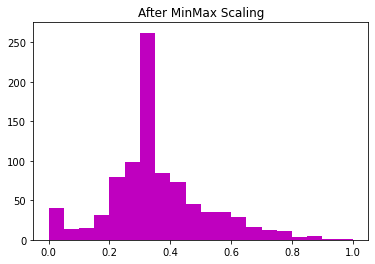

In [8]:
plt.hist(df_minmax['Age'],bins=20,color='m')
plt.title("After MinMax Scaling")

Text(0.5, 1.0, 'Before MinMax Scaling')

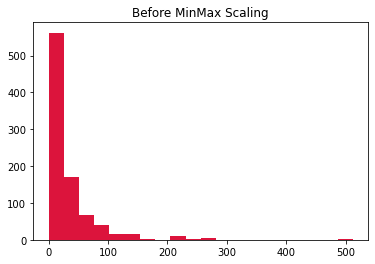

In [9]:
plt.hist(df['Fare'],bins=20,color='crimson')
plt.title("Before MinMax Scaling")

Text(0.5, 1.0, 'After MinMax Scaling')

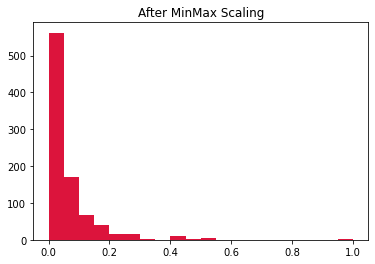

In [10]:
plt.hist(df_minmax['Fare'],bins=20,color='crimson')
plt.title("After MinMax Scaling")

## (ii) Scaling/Transforming the dataset by splitting for making model 

In [11]:
#Separating the independent and dependent features
x=df.iloc[:,1:] # independent
y=df.iloc[:,0]  # dependent

In [12]:
x

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split  # creating model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

x_train_minmax = pd.DataFrame(min_max.fit_transform(x_train), columns=["Pclass",'Age','Fare'])
x_train_minmax.head()

,Pclass,Age,Fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


In [16]:
x_test_minmax = min_max.transform(x_test) 
x_test_minmax

array([[1.        , 0.34656949, 0.02975782],
       [0.5       , 0.3842674 , 0.02049464],
       [1.        , 0.24604172, 0.01546857],
       [0.5       , 0.07011812, 0.06441171],
       [1.        , 0.17064589, 0.02194234],
       [0.        , 0.32143755, 0.15390495],
       [1.        , 0.34656949, 0.01512699],
       [1.        , 0.19577783, 0.03513366],
       [1.        , 0.19577783, 0.01512699],
       [0.        , 0.23347575, 0.05130158],
       [0.        , 0.45966323, 0.1036443 ],
       [1.        , 0.54762503, 0.01571255],
       [1.        , 0.34656949, 0.04970769],
       [1.        , 0.37170143, 0.01410226],
       [0.5       , 0.44709726, 0.02537431],
       [0.        , 0.19577783, 0.07690368],
       [0.        , 0.52249309, 0.10257897],
       [1.        , 0.34656949, 0.01528158],
       [0.5       , 0.33400352, 0.02537431],
       [0.        , 0.58532295, 0.10149724],
       [1.        , 0.2963056 , 0.01541158],
       [0.        , 0.42196532, 0.05182215],
       [1.

### Algorithm starts :

In [17]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [18]:
classification.fit(x_train_minmax,y_train)

LogisticRegression()

In [19]:
predict =classification.predict(x_test_minmax) # Machine prediction on testing data
predict

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
#Printing the classification report

from sklearn import metrics
print(metrics.classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       218
           1       0.49      0.77      0.60        77

    accuracy                           0.73       295
   macro avg       0.69      0.74      0.70       295
weighted avg       0.79      0.73      0.75       295



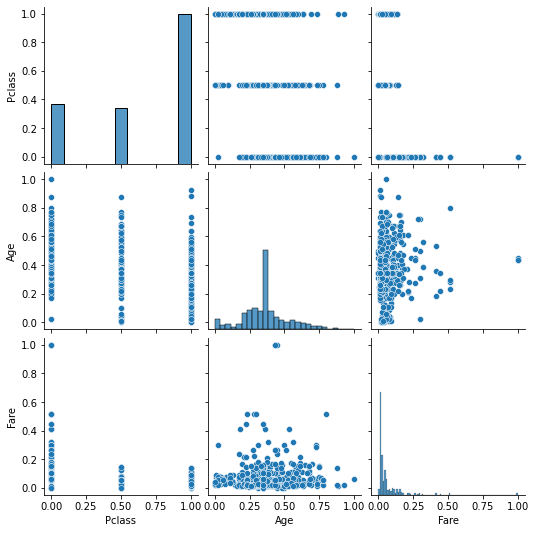

In [21]:
sns.pairplot(x_train_minmax)
# pairplot of x_train_minmax showing that the values are scaled b/w 0 and 1